In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c cifar-10

 94% 674M/715M [00:10<00:01, 31.9MB/s]
100% 715M/715M [00:11<00:00, 68.1MB/s]


In [6]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [8]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 38.0 MB/s eta 0:00:00


In [9]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archive.extractall()
archive.close()

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [11]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

In [12]:
filenames = os.listdir('/content/train') # get a list of all filenames
print(len(filenames))  # no. of files

50000


In [13]:
print(filenames[:5])
print(filenames[-5:])

['6696.png', '26199.png', '34492.png', '31554.png', '18051.png']
['36408.png', '5456.png', '2342.png', '44540.png', '19917.png']


In [14]:
labelsDf = pd.read_csv('/content/trainLabels.csv')

In [15]:
print(labelsDf.head()) # 'id'column is the name of thep picture file
print(labelsDf.shape)
print(labelsDf.tail())

   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
(50000, 2)
          id       label
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile


In [16]:
labelsDf[labelsDf['id'] == 20403] #we have a truck as label at 'id' 20403

,id,label
20402,20403,truck


In [17]:
labelsDf['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [18]:
labels_dict = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labelsDf['label'] = labelsDf['label'].map(labels_dict)

In [19]:
labelsDf.head()

,id,label
0,1,6
1,2,9
2,3,9
3,4,4
4,5,1


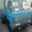

In [20]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/20403.png')

cv2_imshow(img) # it is a truck

# Image Processing

In [21]:
id_list = list(labelsDf['id']) # getting a list of id

In [22]:
training_image_folder = "/content/train"

train_image_data = []

for img_id in id_list:
  # getting the image a giving a numpy array
  img = cv2.imread(os.path.join(training_image_folder, str(img_id)+'.png'))
  train_image_data.append(img)

In [23]:
train_image_data[20403].shape

(32, 32, 3)

In [24]:
print(type(train_image_data))
print(type(train_image_data[0]))
print(len(train_image_data))

<class 'list'>
<class 'numpy.ndarray'>
50000


In [25]:
X = np.array(train_image_data)
Y = np.array(labelsDf['label'])
print(X.shape, Y.shape)

(50000, 32, 32, 3) (50000,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [27]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,)


In [28]:
# Normalizing the data or Scaling the Data
X_train = X_train/255
X_test = X_test/255

# Building the Feed forward Neural Network  

In [29]:
tf.__version__

'2.18.0'

In [30]:
number_of_classes  = 10
model = tf.keras.models.Sequential([
    tf.keras.Input(shape = (32,32,3)), # best practices
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(number_of_classes, activation = 'softmax')
])

In [31]:
#use sparse_categorical_crossentropy if we encoded numerical values
# use categorical_crossentropy if we one hot encoded the values
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# training the neural netword
# model.fit(X_train, Y_train, epochs = 50, validation_split = 0.1)

# Using Transfer Learning - ResNet50

In [34]:
ResNet_Model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (256,256,3), # it is shape of image resnet is trained with
)
ResNet_Model.trainable = False
# ResNet_Model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [35]:
TModel = tf.keras.models.Sequential([
    tf.keras.Input(shape = (32,32,3)),
    tf.keras.layers.UpSampling2D((2,2)), # convert the 32x32 image to 64x64
    tf.keras.layers.UpSampling2D((2,2)), # convert 64x64 image to 128x128 image
    tf.keras.layers.UpSampling2D((2,2)), # convert 128x128 image to 256x256
    ResNet_Model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(number_of_classes, activation = 'softmax')
])
TModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 131072)         │       524,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,899,018 (156.02 MB)

 Trainable params: 17,048,778 (65.04 MB)

 Non-trainable params: 23,850,240 (90.98 MB)

In [36]:

TModel.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)
TModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 131072)         │       524,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,899,018 (156.02 MB)

 Trainable params: 17,048,778 (65.04 MB)

 Non-trainable params: 23,850,240 (90.98 MB)

In [37]:
history = TModel.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 145s 113ms/step - accuracy: 0.2010 - loss: 2.4197 - val_accuracy: 0.4543 - val_loss: 1.6328
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 131s 117ms/step - accuracy: 0.3027 - loss: 2.0429 - val_accuracy: 0.5045 - val_loss: 1.5049
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 133s 109ms/step - accuracy: 0.3373 - loss: 1.9338 - val_accuracy: 0.5182 - val_loss: 1.4483
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 151s 117ms/step - accuracy: 0.3583 - loss: 1.8602 - val_accuracy: 0.5428 - val_loss: 1.4003
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 142s 118ms/step - accuracy: 0.3803 - loss: 1.7925 - val_accuracy: 0.5502 - val_loss: 1.3552
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 133s 110ms/step - accuracy: 0.4028 - loss: 1.7267 - val_accuracy: 0.5638 - val_loss: 1.3276
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 131s 116ms/step - accuracy: 0.4137 - loss: 1.6893 - val_accuracy: 0.5798 - val_loss: 1.2962
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 142s 117ms/step - ac

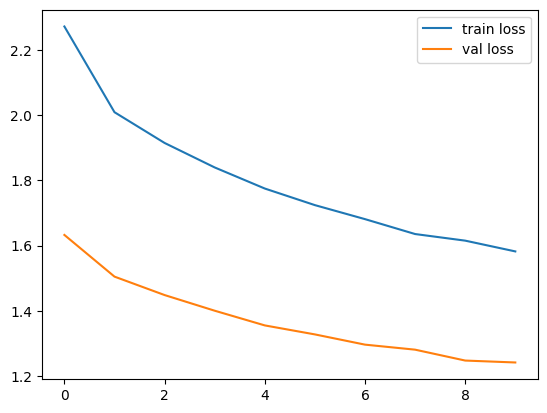

In [38]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

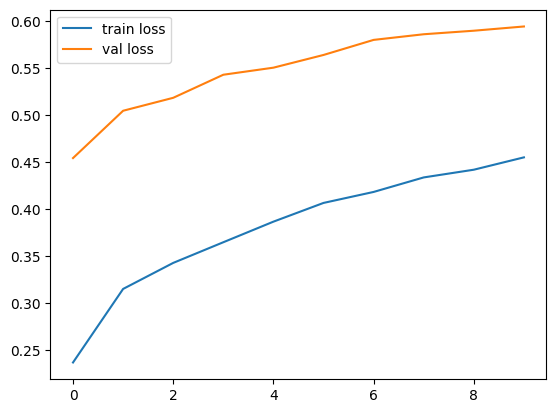

In [39]:
plt.plot(history.history['accuracy'], label='train loss')
plt.plot(history.history['val_accuracy'], label='val loss')
plt.legend()
plt.show()

In [40]:
prediction = TModel.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step


In [42]:
print(prediction)
test_pred = np.argmax(prediction, axis = 1)
print(test_pred)

[[0.04090652 0.01124317 0.2841928  ... 0.20028596 0.01165741 0.01659147]
 [0.02221698 0.8105853  0.00363976 ... 0.0254849  0.06128265 0.06307846]
 [0.05717123 0.02991763 0.0325952  ... 0.1392061  0.01538854 0.03337301]
 ...
 [0.07773823 0.06072797 0.05671372 ... 0.03632201 0.13373809 0.3518721 ]
 [0.04569256 0.08057951 0.11041809 ... 0.0824789  0.09646475 0.09600372]
 [0.11465537 0.2958079  0.05097393 ... 0.01803602 0.30573907 0.09990128]]
[2 1 4 ... 9 6 8]


In [43]:
loss, accuracy = TModel.evaluate(X_test, Y_test)
print("loss: ", loss)
print("accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.5663 - loss: 1.3038
loss:  1.2850301265716553
accuracy:  0.5756999850273132


# Creating a Predictive system

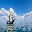

(32, 32, 3)


In [97]:
from google.colab.patches import cv2_imshow

image_name = 'shipper'
img = cv2.imread('/content/'+ str(image_name) +'.jpg')
resized_img = cv2.resize(img, (32,32))
cv2_imshow(resized_img)
print(resized_img.shape)

In [98]:
labels_ans_dict = {0: 'airplane', 1:'automobile', 2: 'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


prediction = TModel.predict(np.array([resized_img]))
f_pred = np.argmax(prediction[0], axis = 0)
print(labels_ans_dict[f_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
airplane
